# 1Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng đầu tiên. 

In [11]:
import pandas as pd

# Đường dẫn tệp CSV
file_path = "D:/du lieu/dulieuxettuyendaihoc.csv"

# Hàm load dữ liệu
def load_data(file_path):
    try:
        df = pd.read_csv(file_path, encoding="utf-8")  # Thử với utf-8
        print(df.head(10))  # Hiển thị 10 dòng đầu tiên
        return df
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding="latin1")  # Thử với latin1 nếu utf-8 lỗi
        print(df.head(10))
        return df

# Gọi hàm load_data
df = load_data(file_path)


   STT   T1   L1   H1   S1   V1   X1   D1   N1   T2  ...   X6   D6   N6  GT  \
0    1  7.2  7.3  6.3  7.3  7.0  7.9  7.3  5.5  8.4  ...  6.6  7.6  5.9   F   
1    2  5.4  3.9  3.9  4.0  5.4  5.4  5.3  2.8  6.3  ...  6.6  6.1  4.4   M   
2    3  5.6  6.8  7.2  7.5  4.3  7.4  5.8  3.2  5.0  ...  7.9  8.1  4.6   M   
3    4  6.6  6.4  5.3  6.9  5.4  7.3  6.4  5.8  5.1  ...  7.1  7.3  7.4   M   
4    5  6.0  5.0  6.0  7.3  6.5  7.7  7.9  6.1  5.4  ...  6.1  7.5  7.2   M   
5    6  9.3  7.6  7.9  8.6  7.0  7.3  7.7  7.9  9.6  ...  5.7  8.0  7.8   M   
6    7  2.8  3.9  5.5  6.9  5.0  7.3  4.6  5.2  4.4  ...  6.6  6.0  6.0   F   
7    8  8.3  6.0  7.6  5.1  7.5  4.7  5.8  7.2  6.7  ...  7.1  6.8  7.0   F   
8    9  6.5  6.3  7.6  6.0  5.5  7.1  6.3  5.0  7.3  ...  9.1  7.9  6.1   F   
9   10  7.3  5.9  4.7  7.1  6.7  7.9  6.7  7.7  8.0  ...  6.4  6.1  7.8   F   

   DT   KV   DH1   DH2   DH3  KT  
0 NaN  2NT  3.25  3.25  4.50  A1  
1 NaN    1  6.00  4.00  3.50   C  
2 NaN    1  5.00  6.75  4

# 2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked 

Số lượng giá trị thiếu trong từng cột:
 STT     0
T1      0
L1      0
H1      0
S1      0
V1      0
X1      0
D1      0
N1      0
T2      0
L2      0
H2      0
S2      0
V2      0
X2      0
D2      0
N2      0
T3      0
L3      0
H3      0
S3      0
V3      0
X3      0
D3      0
N3      0
T4      0
L4      0
H4      0
S4      0
V4      0
X4      0
D4      0
N4      0
T5      0
L5      0
H5      0
S5      0
V5      0
X5      0
D5      0
N5      0
T6      0
L6      0
H6      0
S6      0
V6      0
X6      0
D6      0
N6      0
GT      0
DT     97
KV      0
DH1     0
DH2     0
DH3     0
KT      0
dtype: int64


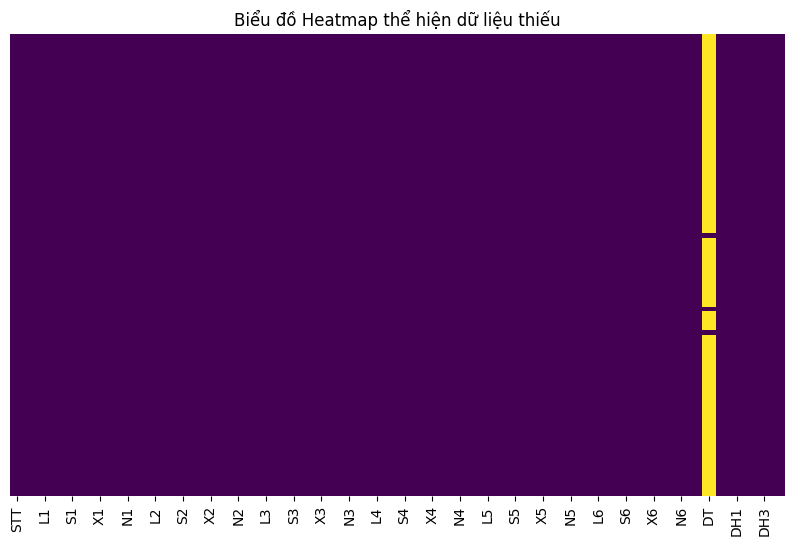

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu
file_path = "D:/du lieu/dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# Kiểm tra dữ liệu bị thiếu
missing_values = df.isnull().sum()
print("Số lượng giá trị thiếu trong từng cột:\n", missing_values)

# Vẽ Heatmap để trực quan hóa dữ liệu thiếu
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Biểu đồ Heatmap thể hiện dữ liệu thiếu")
plt.show()


# 3  Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi tách cột xong thì xóa luôn cột Name 

In [18]:
import pandas as pd

# Đọc dữ liệu
file_path = "D:/du lieu/dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path)

# Xác định cột có dữ liệu dạng họ tên
def detect_name_column(df):
    for col in df.columns:
        if df[col].dtype == 'object' and df[col].str.contains(' ', na=False).any():
            return col
    return None

name_col = detect_name_column(df)

if name_col:
    # Tách cột họ tên thành firstName và secondName
    df[['firstName', 'secondName']] = df[name_col].str.rsplit(' ', n=1, expand=True)
    
    # Xóa cột gốc
    df.drop(columns=[name_col], inplace=True)
    
    # Lưu lại file mới
    output_path = "D:/du lieu/dulieuxettuyendaihoc_processed.csv"
    df.to_csv(output_path, index=False)
    print(f"Đã xử lý xong! File được lưu tại: {output_path}")
else:
    print("Không tìm thấy cột chứa họ tên.")



Không tìm thấy cột chứa họ tên.


In [20]:
import pandas as pd

# Đọc dữ liệu từ file CSV
df = pd.read_csv('D:/du lieu/dulieuxettuyendaihoc.csv')

# Kiểm tra và thay thế giá trị trong cột Sex
if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].replace({'male': 'M', 'female': 'F'})
else:
    print("Không tìm thấy cột 'Sex' trong dữ liệu.")

# Lưu lại file đã xử lý
df.to_csv('D:/du lieu/dulieuxettuyendaihoc_processed.csv', index=False)
print("Đã thay thế dữ liệu trong cột 'Sex' và lưu file mới.")

Không tìm thấy cột 'Sex' trong dữ liệu.
Đã thay thế dữ liệu trong cột 'Sex' và lưu file mới.


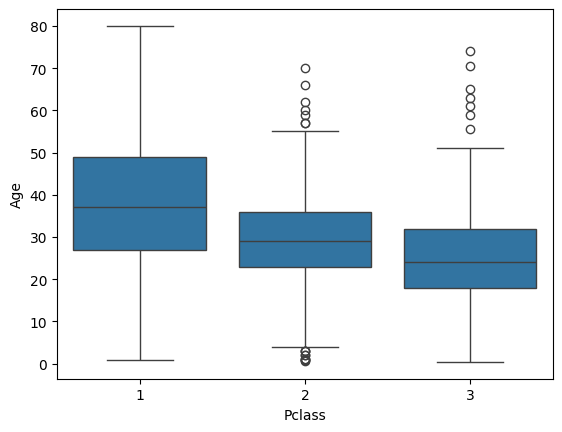

   pclass   age
0       3  22.0
1       1  38.0
2       3  26.0
3       1  35.0
4       3  35.0
5       3  24.0
6       1  54.0
7       3   2.0
8       3  27.0
9       2  14.0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Đọc dữ liệu Titanic từ Seaborn (hoặc có thể thay bằng file CSV nếu cần)
titanic = sns.load_dataset("titanic")
# Vẽ boxplot
sns.boxplot(y="age", x="pclass", data=titanic)
plt.xlabel("Pclass")
plt.ylabel("Age")
plt.show()
# Xử lý dữ liệu thiếu trong cột Age theo giá trị trung vị của từng nhóm Pclass
titanic.loc[titanic["pclass"] == 1, "age"] = titanic.loc[titanic["pclass"] == 1, "age"].fillna(
    titanic.loc[titanic["pclass"] == 1, "age"].median()
)
titanic.loc[titanic["pclass"] == 2, "age"] = titanic.loc[titanic["pclass"] == 2, "age"].fillna(
    titanic.loc[titanic["pclass"] == 2, "age"].median()
)
titanic.loc[titanic["pclass"] == 3, "age"] = titanic.loc[titanic["pclass"] == 3, "age"].fillna(
    titanic.loc[titanic["pclass"] == 3, "age"].median()
)
# Kiểm tra lại dữ liệu
print(titanic[["pclass", "age"]].head(10))

# 5

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Đọc dữ liệu Titanic
df = pd.read_csv("D:/du lieu/dulieuxettuyendaihoc")
# Vẽ boxplot để quan sát phân phối tuổi giữa các hạng vé
plt.figure(figsize=(8, 6))
sns.boxplot(x="Pclass", y="Age", data=df)
plt.title("Phân phối tuổi theo hạng vé")
plt.xlabel("Hạng vé (Pclass)")
plt.ylabel("Tuổi (Age)")
plt.show()
# Nhận xét:
# - Có sự khác biệt rõ rệt giữa các nhóm hạng vé: Hạng 1 có tuổi trung bình cao hơn hạng 2, 3.
# - Vì vậy, ta thay thế giá trị thiếu theo từng nhóm hạng vé thay vì toàn bộ dữ liệu.
# Thay thế giá trị thiếu trong cột Age bằng trung bình tuổi theo từng hạng vé
df["Age"] = df.groupby("Pclass")["Age"].transform(lambda x: x.fillna(x.mean()))
# Kiểm tra lại dữ liệu sau khi thay thế
print(df[["Pclass", "Age"]].head(10))
# Vẽ heatmap để trực quan hóa dữ liệu đã xử lý
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap hiển thị dữ liệu thiếu (sau khi xử lý)")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'D:/du lieu/dulieuxettuyendaihoc'

6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa 
trên độ tuổi của hành khách như sau: (age =< 12] → Kid; (12, 18]: Teen, (18, 60]: Adult 
và ( age > 60): Older

In [33]:
import pandas as pd

# Tạo DataFrame mẫu
data = {'Age': [5, 15, 25, 65]}
tidisater5 = pd.DataFrame(data)

# Áp dụng phân loại nhóm tuổi
tidisater5.loc[tidisater5['Age'] <= 12, 'Agegroup'] = 'Kid'
tidisater5.loc[(tidisater5['Age'] > 12) & (tidisater5['Age'] <= 18), 'Agegroup'] = 'Teen'
tidisater5.loc[(tidisater5['Age'] > 18) & (tidisater5['Age'] <= 60), 'Agegroup'] = 'Adult'
tidisater5.loc[tidisater5['Age'] > 60, 'Agegroup'] = 'Older'

print(tidisater5)


   Age Agegroup
0    5      Kid
1   15     Teen
2   25    Adult
3   65    Older


7tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách  Mr, 
Mrs, Miss, Master ra khỏi “secondName” 

In [37]:
import pandas as pd

# Danh sách danh xưng hợp lệ
valid_prefixes = ["Mr", "Mrs", "Miss", "Master"]

# Kiểm tra nếu cột "secondName" có tồn tại
if "secondName" in tidisater5.columns:
    # Hàm tách danh xưng
    def extract_prefix(name):
        parts = name.strip().split()
        return parts[0] if parts[0] in valid_prefixes else None

    # Áp dụng hàm cho cột secondName
    tidisater5["namePrefix"] = tidisater5["secondName"].apply(extract_prefix)

    print(tidisater5)
else:
    print("Cột 'secondName' không tồn tại trong DataFrame.")


Cột 'secondName' không tồn tại trong DataFrame.


8 Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối 
với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch 


In [40]:
import pandas as pd

# Tạo dữ liệu mẫu với các cột SibSp và Parch
data = {
    "PassengerID": [1, 2, 3, 4, 5],
    "SibSp": [1, 0, 2, 1, 0],   # Số anh chị em/vợ chồng đi cùng
    "Parch": [0, 0, 1, 2, 3]    # Số cha mẹ/con cái đi cùng
}

# Chuyển dữ liệu thành DataFrame
tidisater5 = pd.DataFrame(data)

# Tính số lượng thành viên trong gia đình
tidisater5["familySize"] = 1 + tidisater5["SibSp"] + tidisater5["Parch"]

# Hiển thị kết quả
print(tidisater5)



   PassengerID  SibSp  Parch  familySize
0            1      1      0           2
1            2      0      0           1
2            3      2      1           4
3            4      1      2           4
4            5      0      3           4


9 Tạo thêm đặc trưng ‘Alone’ để xác định hành khách đi theo nhóm hay cá nhân bằng cách 
dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0. 

In [41]:
import pandas as pd

# Tạo dữ liệu mẫu
data = {
    "PassengerID": [1, 2, 3, 4, 5],
    "SibSp": [1, 0, 2, 1, 0],   # Số anh chị em/vợ chồng đi cùng
    "Parch": [0, 0, 1, 2, 3]    # Số cha mẹ/con cái đi cùng
}

# Chuyển dữ liệu thành DataFrame
tidisater5 = pd.DataFrame(data)

# Tính số lượng thành viên trong gia đình (familySize)
tidisater5["familySize"] = 1 + tidisater5["SibSp"] + tidisater5["Parch"]

# Tạo đặc trưng 'Alone': Nếu familySize == 1 thì Alone = 1 (đi một mình), ngược lại Alone = 0
tidisater5["Alone"] = (tidisater5["familySize"] == 1).astype(int)

# Hiển thị kết quả
print(tidisater5)


   PassengerID  SibSp  Parch  familySize  Alone
0            1      1      0           2      0
1            2      0      0           1      1
2            3      2      1           4      0
3            4      1      2           4      0
4            5      0      3           4      0


Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính 
cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu 
thì thay thế bằng “Unknown” 

In [42]:
import pandas as pd

# Tạo dữ liệu mẫu với thông tin cabin (có dữ liệu thiếu)
data = {
    "PassengerID": [1, 2, 3, 4, 5, 6],
    "Cabin": ["C85", "E23", None, "B57", "D12", None]  # Một số giá trị Cabin bị thiếu (None)
}

# Chuyển dữ liệu thành DataFrame
tidisater5 = pd.DataFrame(data)

# Xử lý loại cabin:
tidisater5["typeCabin"] = tidisater5["Cabin"].fillna("Unknown").apply(lambda x: x[0] if x != "Unknown" else x)

# Hiển thị kết quả
print(tidisater5)


   PassengerID Cabin typeCabin
0            1   C85         C
1            2   E23         E
2            3  None   Unknown
3            4   B57         B
4            5   D12         D
5            6  None   Unknown


10 Loại bỏ dữ liệu thừa đối với các hành khách xuất hiện trong cả 2 tập dữ liệu huấn luyện  
(train.csv) và đánh giá (test.csv). Ưu tiên giữ lại dữ liệu trong tập huấn luyện. 

In [43]:
import pandas as pd

# Đọc dữ liệu từ train.csv và test.csv
train_df = pd.read_csv("train.csv") # mẫu dữ lieu
test_df = pd.read_csv("test.csv")

# Xác định các hành khách trùng lặp dựa trên PassengerID
duplicate_passengers = test_df[test_df["PassengerID"].isin(train_df["PassengerID"])]

# Loại bỏ các hành khách trùng lặp trong tập test.csv
test_df_clean = test_df[~test_df["PassengerID"].isin(train_df["PassengerID"])]

# Hiển thị số lượng hành khách bị loại bỏ
print(f"Số lượng hành khách trùng lặp bị loại bỏ: {len(duplicate_passengers)}")

# Lưu lại tập dữ liệu đã làm sạch (nếu cần)
test_df_clean.to_csv("test_clean.csv", index=False)

# Hiển thị dữ liệu test sau khi làm sạch
print(test_df_clean.head())


FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'